# Automobile Data Analysis
## (By Alonge Daniel)

### About Data
This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.


* **NOTE:** for the dataset use for this project only 20 of the features listed above were uses 

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Automobile)


### Loading necessary libraries and the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Accessing Data

In [3]:
# Loading Data
data = pd.read_csv('automobile_data.csv')
data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


### Investigate Data

In [4]:
#data.info()
#data.describe()
#data.make.unique()
#data.fuel_type.unique()
#data.num_of_doors.unique()
#data.body_style.unique()
#data.drive_wheels.unique()
#data.drive_wheels.value_counts()
#data.engine_location.unique()
#data.num_of_cylinders.unique()
#data.num_of_cylinders.value_counts()
#data.engine_type.unique()
#data.fuel_system.unique()


#### Observations

* Amidst the 20 featurs only num_of_doors feature has 2 null column
* Its also observe that the minimum value in the price column is 0 which dosen't realy make sence for a car to be sold at 0 dollars
* In the number of cylinders there's a single value in it that's rpresent as tow instead of two
* Also in the drive wheel columns some of the columns some cars that were 4wd were represented with an extra space which affect the consistency of the data



### Data Cleaning

* fix the null columns in the num_of_doors feature with the mode Value

In [5]:

data.num_of_doors.unique()
data.num_of_doors.fillna('four',inplace=True)

# Validate Changes
sum(data.num_of_doors.isna())

0

* Change value of the prices with zero to the mean value of the price column

In [6]:

data.price[data.price <5118]
mean =np.mean(data.price)
data.price[data.price == 0] = mean

# Validate Changes
data.price[data.price <5118]


C:\Users\pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], Name: price, dtype: float64)

* In the number of cylinders there's a single value in it that's represent as tow instead of two

In [7]:
data.num_of_cylinders.unique()
data.num_of_cylinders = data.num_of_cylinders.replace('tow','two')

# Validate Changes
data.num_of_cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

* Also in the drive wheel columns some of the columns some cars that were 4wd were represented with an extra space which affect the consistency of the data

In [8]:
print(data.drive_wheels.unique())

data.drive_wheels = data.drive_wheels.str.strip()
print(data.drive_wheels.unique())

['rwd' 'fwd' '4wd ' '4wd']
['rwd' 'fwd' '4wd']


##### Data Analysis

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:100: UserWarning: The handle <matplotlib.patches.Patch object at 0x00000258C07EC5C8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


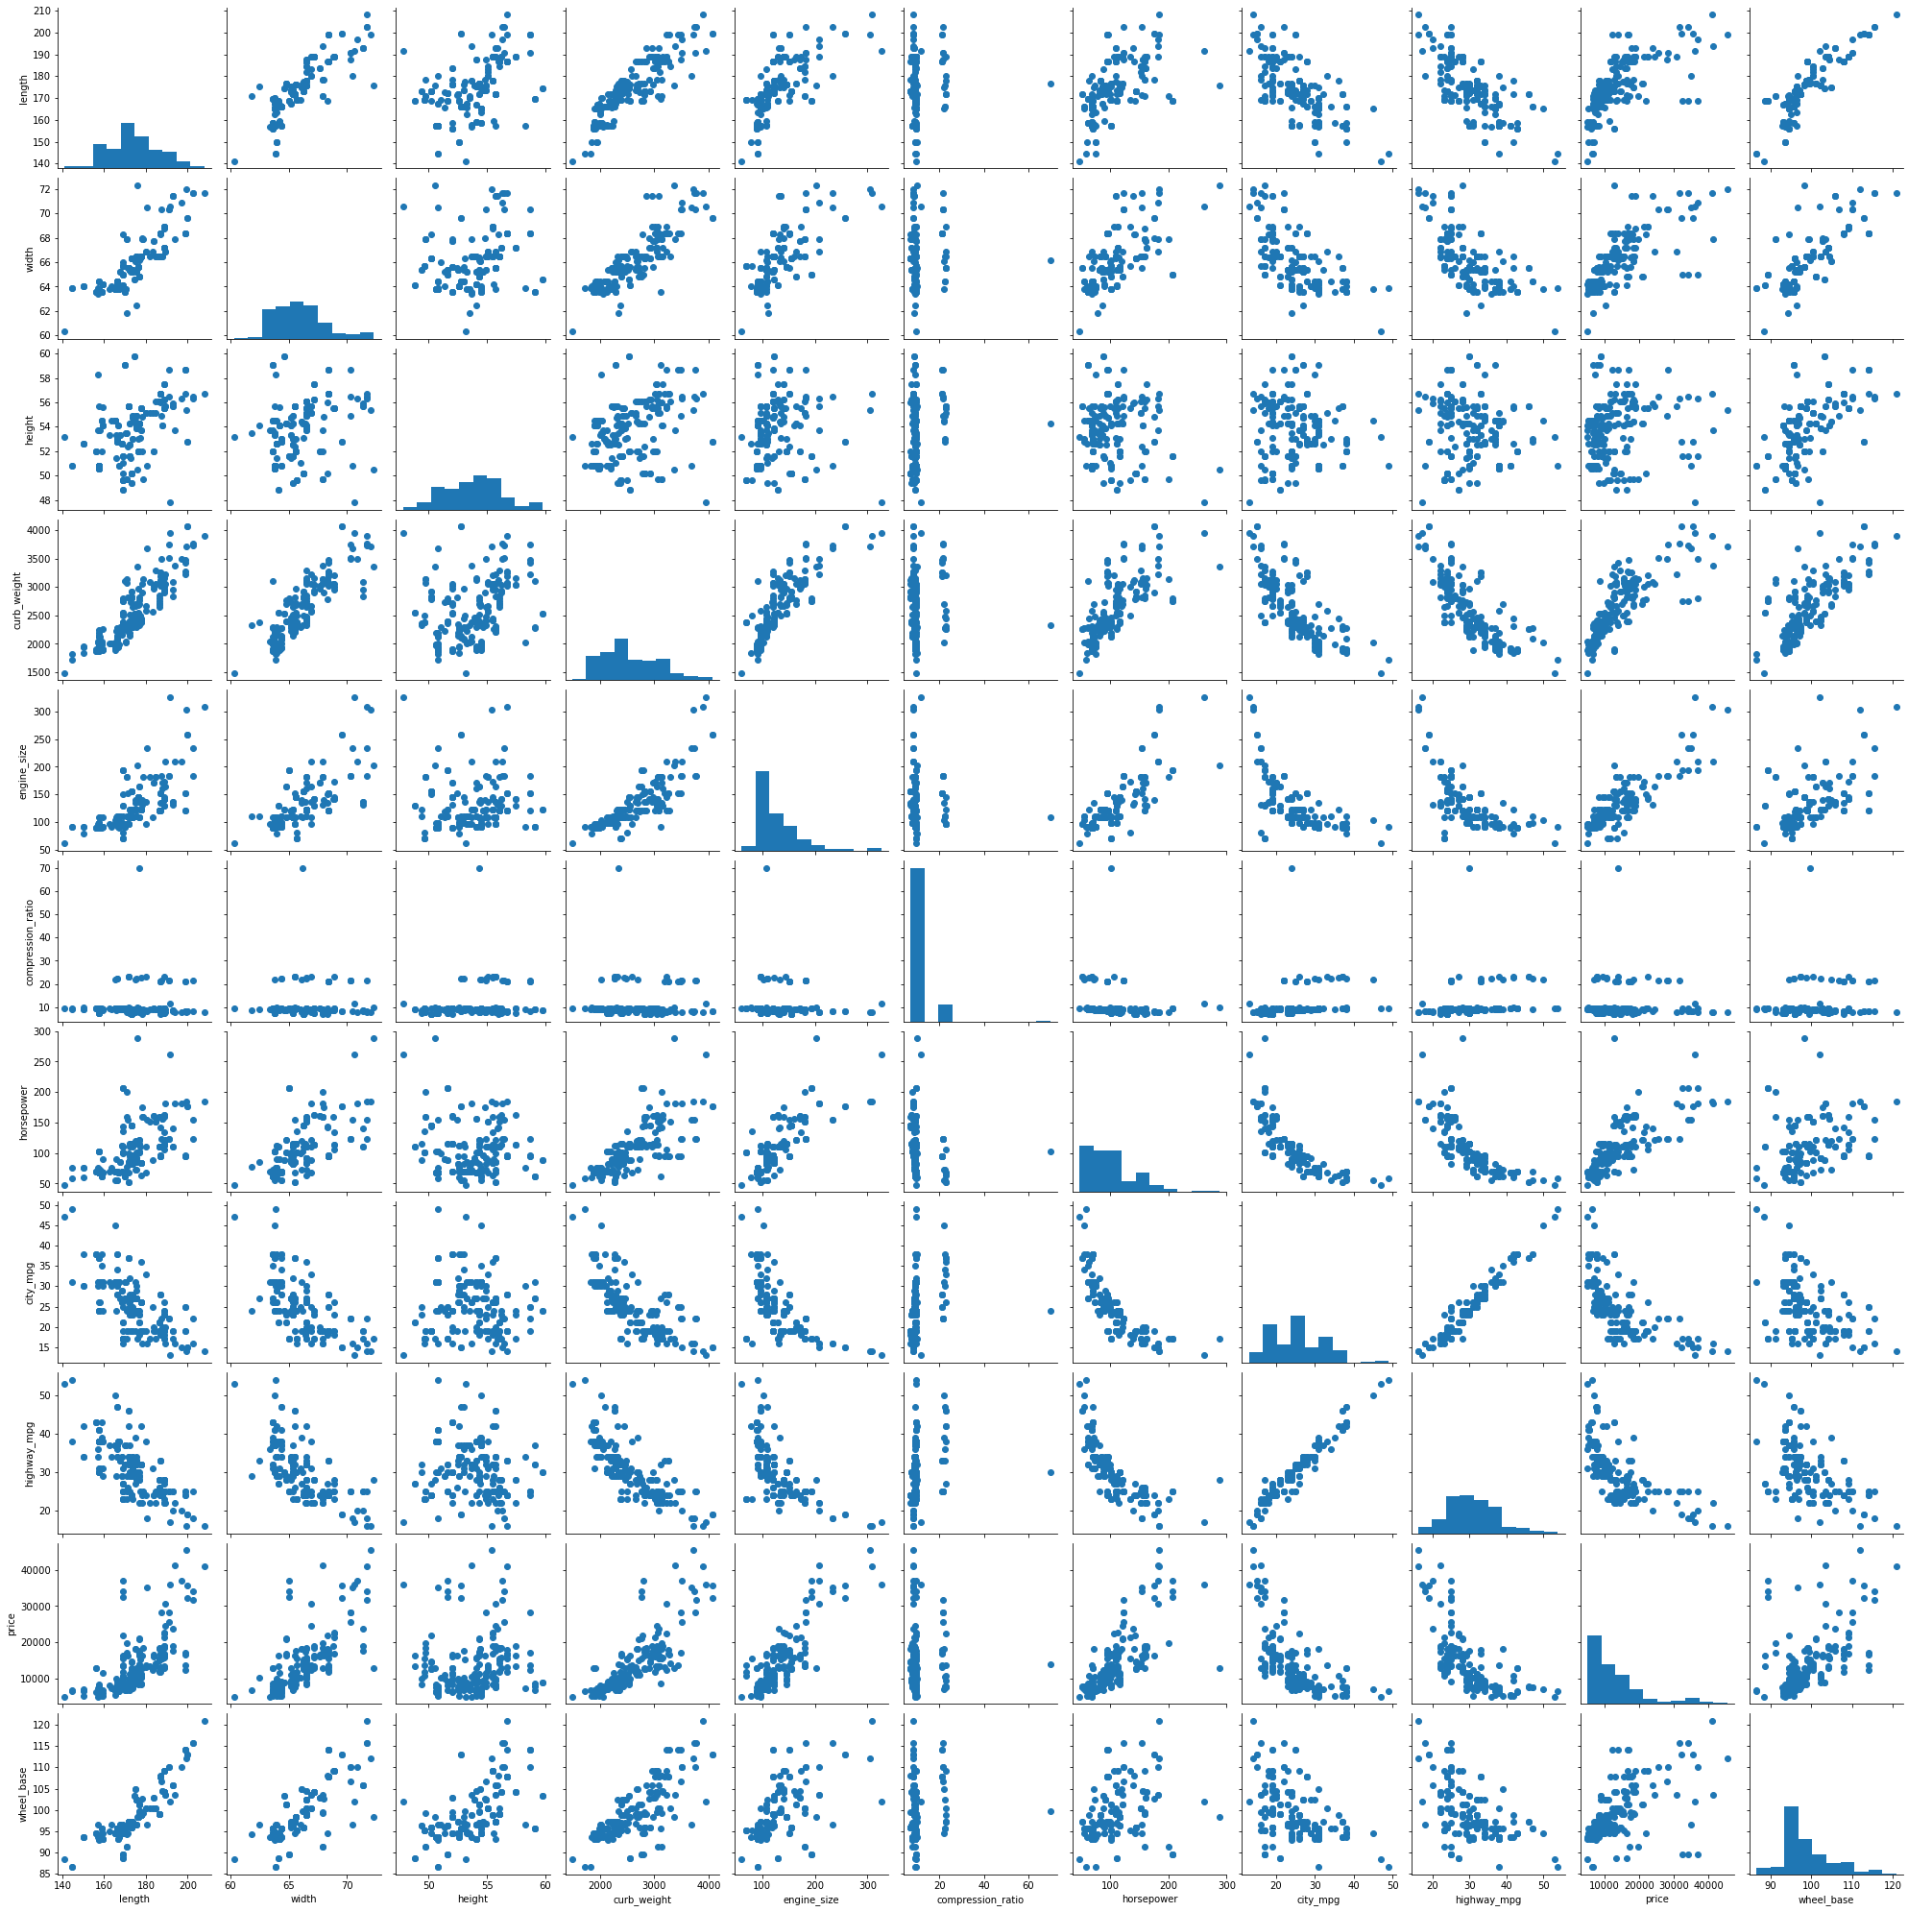

In [9]:
numerical_columns = ['length','width','height','curb_weight','engine_size','compression_ratio','horsepower','city_mpg','highway_mpg','price','wheel_base']

#plt.figure(figsize=(40,20))

#plt.subplot(3,3,1)
#plt.hist(data.price,bins=20)
#plt.title('Price Distribution')
#plt.clf()


numeric_data=data[numerical_columns]
graph = sns.PairGrid(numeric_data)
graph.map_diag(plt.hist)
graph.map_offdiag(plt.scatter)
graph.add_legend()
plt.show()

In [10]:
# data.price[data.price < 5000] About 4 cars has the price zero which dosen't really make sense

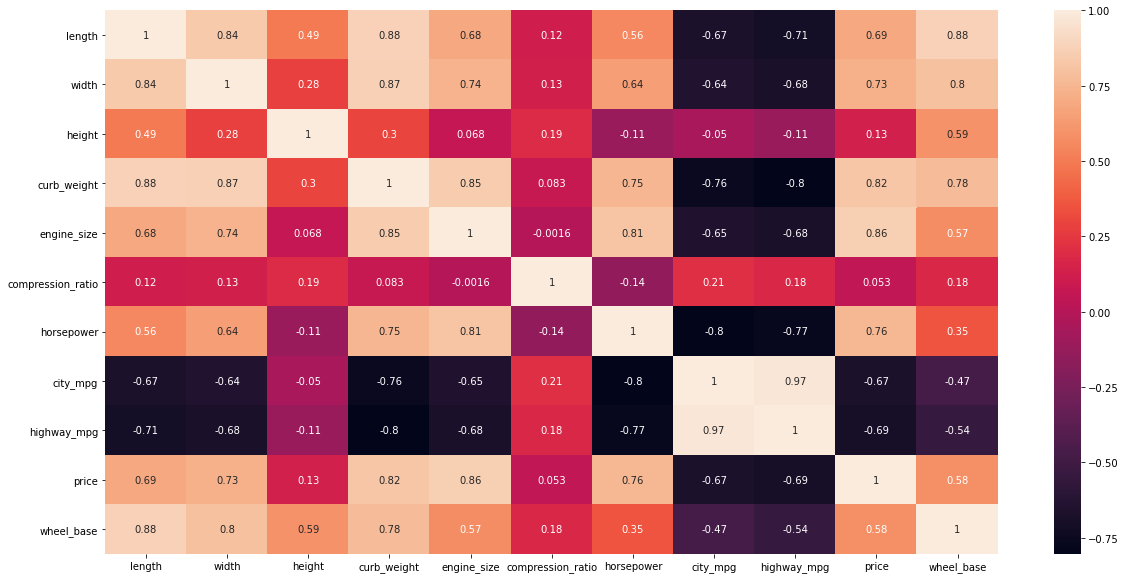

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

#### Insight

* There's a lot of almost perfect correlation that exist between the numerical datas but the engine_size and the curb_weight are the most correlated feature with Price


### Categorical Feature Counts

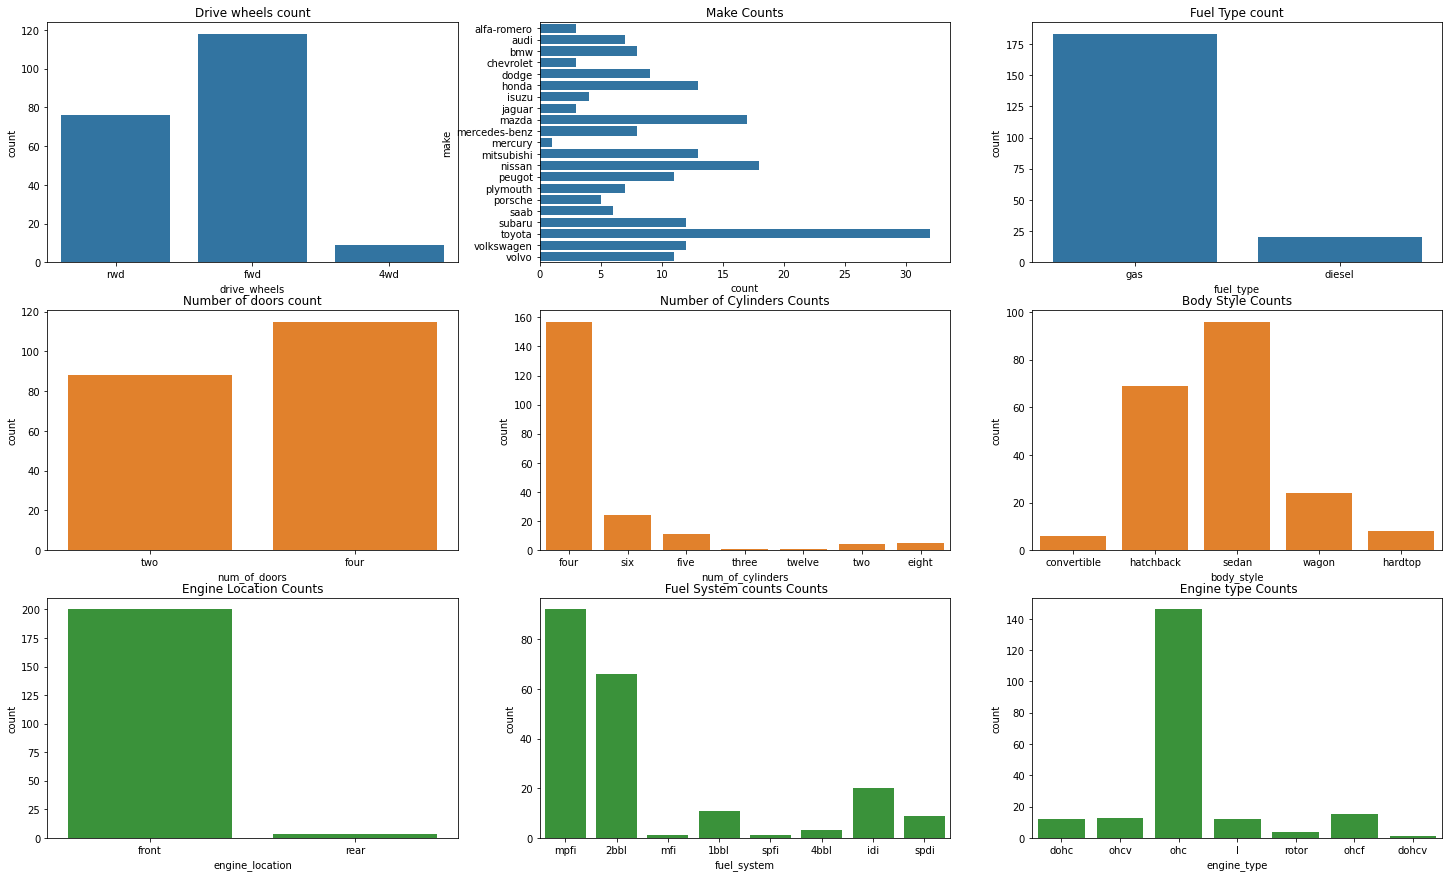

In [12]:
color = sns.color_palette()

plt.figure(figsize=(25,15))
plt.subplot(3,3,1)
sns.countplot(data.drive_wheels, color=color[0])
plt.title('Drive wheels count')

plt.subplot(3,3,2)
sns.countplot(y=data.make.sort_values(ascending=True), color=color[0])
plt.title('Make Counts')

plt.subplot(3,3,3)
sns.countplot(data.fuel_type, color=color[0])
plt.title('Fuel Type count')

plt.subplot(3,3,4)
sns.countplot(data.num_of_doors, color=color[1])
plt.title('Number of doors count')

plt.subplot(3,3,5)
sns.countplot(data.num_of_cylinders, color=color[1])
plt.title('Number of Cylinders Counts')

plt.subplot(3,3,6)
sns.countplot(data.body_style, color=color[1])
plt.title('Body Style Counts')

plt.subplot(3,3,7)
sns.countplot(data.engine_location, color=color[2])
plt.title('Engine Location Counts')

plt.subplot(3,3,8)
sns.countplot(data.fuel_system, color=color[2])
plt.title(' Fuel System counts Counts')


plt.subplot(3,3,9)
sns.countplot(data.engine_type, color=color[2])
plt.title(' Engine type Counts')
plt.show()


#### Insights
Most of the cars in the datasets has the following ?
- Their engine in front
- four doors
- four cylinders
- ohc enginetype e.t.c

#### Categorical features in relation to price

* Price vs engine_size vs drive wheels

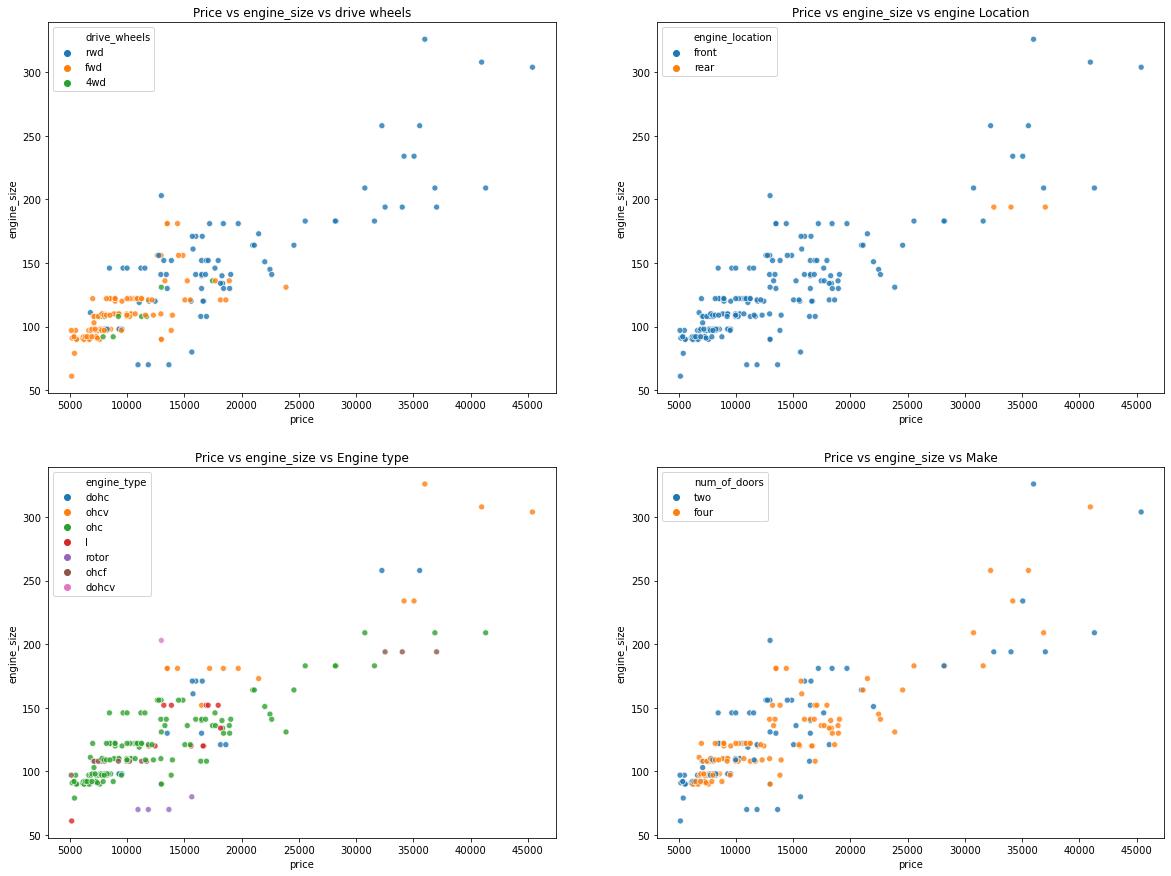

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.scatterplot(data.price,data.engine_size,hue=data.drive_wheels,alpha=0.8)
plt.title('Price vs engine_size vs drive wheels')

plt.subplot(2,2,2)
sns.scatterplot(data.price,data.engine_size,hue=data.engine_location,alpha=0.8)
plt.title('Price vs engine_size vs engine Location')

plt.subplot(2,2,3)
sns.scatterplot(data.price,data.engine_size,hue=data.engine_type,alpha=0.8)
plt.title('Price vs engine_size vs Engine type')

plt.subplot(2,2,4)
sns.scatterplot(data.price,data.engine_size,hue=data.num_of_doors,alpha=0.8)
plt.title('Price vs engine_size vs Make')
plt.show()

#### Insights
* Base on the above plots the right wheel drive cars are the most expensive cars even more expensive than the 4 wheel drive although the amount of 4wd cars in the datase is not enough to jump into conclusion for a general population

* There's no correlation between the number of doors have and the price

* the few cars with rear engine location are also expensive

#### Hypothesis 
* Null Hypothesis: There's no relation between the number of doors a car has and the body style
* ALternate Hypothesis: There's a relation between the numbers of doors and the body style

In [14]:
from scipy.stats import chi2_contingency

threshold = 0.05
# using chi2 contigency

# Creating Contigency table

table = pd.crosstab(data.num_of_doors,data.body_style)
print('............... Contigency Table .............')
print()
print(table)
stat, p, dof, expected = chi2_contingency(table)

print('p_value is =', p)

if p <= threshold:
    print('......................................')
    print('Null hypothesis Rejected')
    print("There's a significant relationshp between the number of doors and the body style")
else:
    print("Null Hypothesis accepted there's no relation between the number of doors and the body style")

............... Contigency Table .............

body_style    convertible  hardtop  hatchback  sedan  wagon
num_of_doors                                               
four                    0        0         10     81     24
two                     6        8         59     15      0
p_value is = 2.7809810889693893e-24
......................................
Null hypothesis Rejected
There's a significant relationshp between the number of doors and the body style


### Converting categorical features to numerical features

* Using label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

numerical_columns = ['length','width','height','curb_weight','engine_size','compression_ratio','horsepower','city_mpg','highway_mpg','price','wheel_base']
numeric_data=data[numerical_columns]

categorical_columns = [column for column in data.columns if column not in numerical_columns]
categorical_data = data[categorical_columns]

feature_dictionary_encoding = {}

for feature in categorical_columns:
    label = encoder.fit_transform(categorical_data[feature])
    categorical_data = categorical_data.drop(feature, axis=1)
    le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    feature_dictionary_encoding[feature] = le_name_mapping   
    categorical_data[feature] = label

    
update_data = pd.concat([numeric_data,categorical_data],axis=1)

In [ ]:
import json
 

# Saving Features to json file
data = str(feature_dictionary_encoding)
data = data.replace("\'", "\"")
# Writing to sample.json
with open("feature_dictionary_encoding.json", "w") as outfile:
    outfile.write(data)

### Feature Selection
* Select the Top 10 features in building our linear regression model for the price preddiction using the Sequential feature selector

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = update_data.drop('price', axis=1)
y = update_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# Select the best 10 features using Sequential feature selector
sfs1 = sfs(model,
           k_features=10,
           forward=True,
           floating=False,
           scoring='r2',
           cv=5)

sfs1.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(10, 10),
                          scoring='r2')

* The top 10 features are 'width',
 'height',
 'curb_weight',
 'engine_size',
 'highway_mpg',
 'make',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type'

In [23]:
# Selecting the best 10 features
feat_names = list(sfs1.k_feature_names_)
feat_names

['width',
 'height',
 'curb_weight',
 'engine_size',
 'highway_mpg',
 'make',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type']

### Model Creation

* Create model and validate using R2 Score

In [24]:
X_train = X_train[feat_names]
X_test = X_test[feat_names]

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('R2 Score=',r2_score(predictions,y_test))

R2 Score= 0.6370869733450824


* The Model has an r2_score of about 64 percent

### Save Model


In [27]:
import pickle

filename = 'car_price_predictor.pkl'
pickle.dump(model,open(filename, 'wb'))

### Conclusion

* The Top Features were selected base on the result of the Sequential forward selector and were use to train the model which inturn return the R2 score of about 64 percent and the model was save as car_price_predictor.sav.

In [35]:
filename = 'car_price_predictor.pkl'
pickle.load(open(filename, 'rb'))

In [44]:
data = [8,4433,433,262,22,0,3,0,0,0]
data = np.array(data).reshape(1,-1)
pred = model.predict(data)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [45]:
print(pred[0])

881740.4119650739
